# Time series visualization by `Pandas`

*April 2, 2021 10:53*

## 1. Single time series

In [67]:
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# display all rows
pd.set_option('expand_frame_repr', False)

url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
country = 'China'
df = pd.read_csv(url, delimiter=',', )
df_ts = pd.DataFrame(df[df['Country/Region'] == f'{country}'].sum(axis=0, numeric_only=True,), columns=[f'num_death_in_{country}'],).iloc[2:]

df_ts.index = pd.to_datetime(df_ts.index)

df_ts.head()

,num_death_in_China
2020-01-22,17.0
2020-01-23,18.0
2020-01-24,26.0
2020-01-25,42.0
2020-01-26,56.0


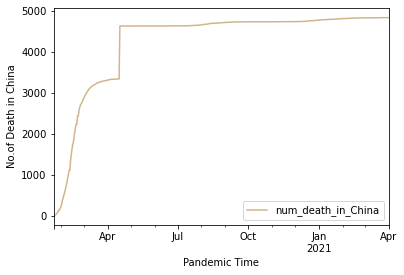

In [55]:
ax = df_ts.plot(color = 'tan')
ax.set_xlabel('Pandemic Time')
ax.set_ylabel(f'No.of Death in {country}')
plt.show()

In [57]:
data_filepath = 'C:\\Users\\dengj/ubc_mds_21/ds_block6/574_spat_temp_mod/DSCI_574_lab1_dengjr/data/'


In [62]:

beach_df = pd.read_csv(data_filepath + 'beach_train.csv', delimiter=',', index_col=['Time'], parse_dates=True)
beach_df.head()

,Shoreline
Time,
1976-04-27,78.5
1976-05-10,65.1
1976-05-18,72.9
1976-05-25,76.0
1976-06-02,83.4


In [63]:
beach_df = beach_df.interpolate()
beach_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 580 entries, 1976-04-27 to 2016-12-12
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Shoreline  580 non-null    float64
dtypes: float64(1)
memory usage: 9.1 KB


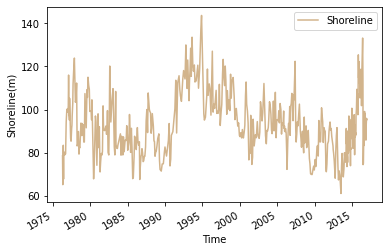

In [65]:
ax = beach_df.plot(color = 'tan')
ax.set_xlabel('Time')
ax.set_ylabel(f'Shoreline(m)')
plt.show()

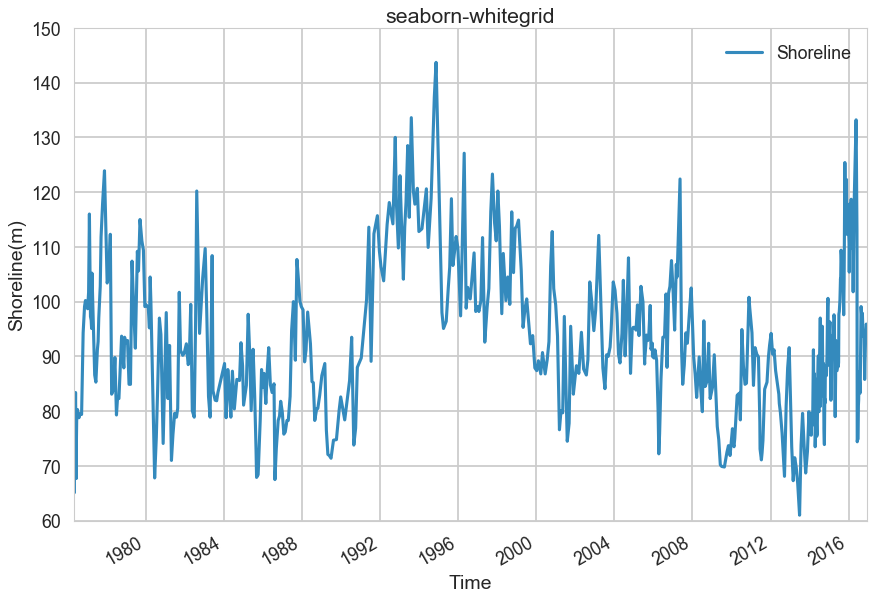

In [113]:
# see the pre-set plot style
styles = (plt.style.available)
probs=np.random.dirichlet(np.ones(len(styles)),size=1).flatten()

style = np.random.choice(styles, p=probs)
plt.style.use(f'{style}')
ax1 = beach_df.plot()
ax1.set_title(f'{style}')
ax1.set_ylabel('Shoreline(m)')
plt.show()

## 2. Put more details

> The graph above is a simple line plot, but more details could be added by using the parameters in `plot()`. This will help the graph being more aesthetic and clear by putting up details.
- `figsize(width, height)` for the figure size
- `linewidth` for the size of the lines
- `fontsize` for the font size
- `set_title()` to set the title

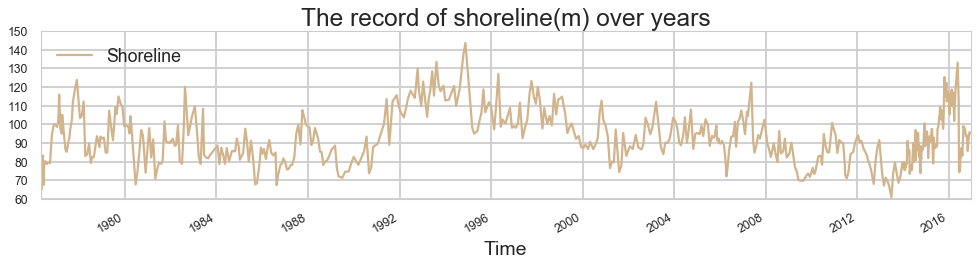

In [123]:
ax = beach_df.plot(color='tan', figsize=(15, 3), linewidth=2, fontsize=11)
ax.set_title('The record of shoreline(m) over years', fontsize=22)
plt.show()

> If you want to see the trend in any sub-time range, you could index such time range and then plotting

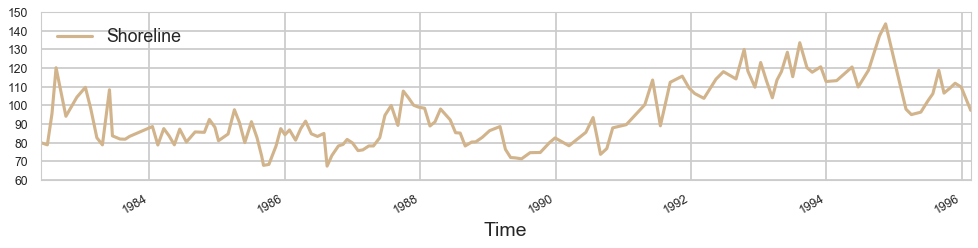

In [140]:
df_subset = beach_df['1982-05-25':'1996-02-18']
ax = df_subset.plot(color='tan', fontsize=11, figsize=(15, 3))
plt.show()

> If you want to emphasize particular observation, you could use `.axvline()` and `.axhline()` to add vertical and horizontal lines.

In [263]:
beach_df.index[111:444];

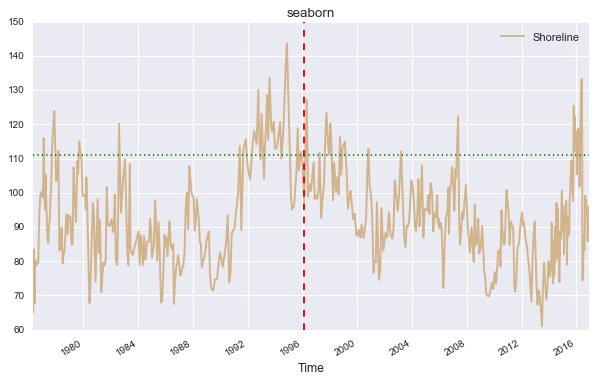

In [182]:
probs=np.random.dirichlet(np.ones(len(styles)),size=1).flatten()
style = np.random.choice(styles, p=probs)

plt.style.use(f'{style}')
ax = beach_df.plot(color='tan', fontsize=9)
ax.set_title(f'{style}')
ax.axvline('1996-02-11', color='red', linestyle='--')
ax.axhline(111.11, color='green', linestyle=':')
plt.show()

> `axvspan()` will allow you to add shade for particular areas, where `alpha` is for transparent rate (0 is totally transparent and 1 is fully colored)

In [197]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())

In [222]:
beach_df.max()

Shoreline    143.7
dtype: float64

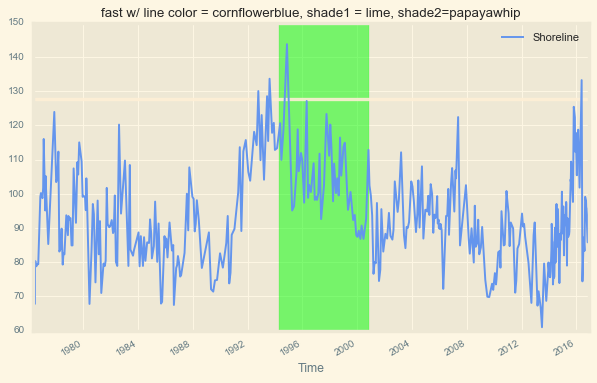

In [333]:
probs=np.random.dirichlet(np.ones(len(styles)),size=1).flatten()
probs2=np.random.dirichlet(np.ones(len(colors)),size=1).flatten()
style = np.random.choice(styles, p=probs)
linecolor = np.random.choice(colors, p=probs2)
shadecolor1 = colors[int(np.random.randint(len(colors), size=1))]
shadecolor2 = colors[int(np.random.randint(len(colors), size=1))]
plt.style.use(f'{style}')
ax = beach_df.plot(color=f'{linecolor}', fontsize=9)
ax.set_title(f'{style} w/ line color = {linecolor}, shade1 = {shadecolor1}, shade2={shadecolor2}')
ax.axvspan('1994-04-19', '2000-11-11', color=f'{shadecolor1}', alpha=.5)
n1=np.random.randint(144, size=1)
n2=np.random.randint(n1, 144, size=1)
ax.axhspan(int(n1), int(n2), color=f'{shadecolor2}', alpha=.88)
plt.show()

## 3. `rolling()`

> `rolling()` can help you move the observing window size.

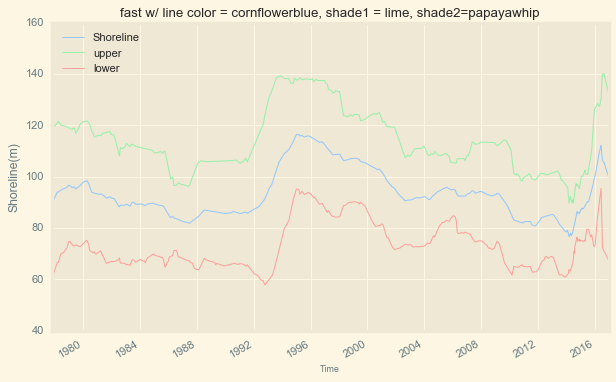

In [334]:
w = 33
ma=beach_df.rolling(window=w).mean()
mstd = beach_df.rolling(window=w).std()

ma['upper'] = ma.Shoreline + mstd.Shoreline*2
ma['lower'] = ma.Shoreline - mstd.Shoreline*2
ax = ma.plot(linewidth=.9)
ax.set_xlabel('Time', fontsize=8)
ax.set_ylabel("Shoreline(m)")
ax.set_title(f'{style} w/ line color = {linecolor}, shade1 = {shadecolor1}, shade2={shadecolor2}')
plt.show()

## 4. Multiple time-series


In [381]:
min_=beach_df.Shoreline.min()
max_=beach_df.Shoreline.max()
beach_df['sync1'] = np.random.gamma(55, 4, 580)
beach_df['sync2'] = np.random.gamma(8, 5, 580)
beach_df

,Shoreline,sync1,sync2
Time,,,
1976-04-27,78.5,237.570889,37.751587
1976-05-10,65.1,227.723314,26.605998
1976-05-18,72.9,201.064585,30.637532
1976-05-25,76.0,274.045957,53.624320
1976-06-02,83.4,201.650480,57.926380
...,...,...,...
2016-10-14,94.0,227.506762,34.667005
2016-10-25,85.8,228.515189,26.186473
2016-11-11,93.3,187.922818,37.986964


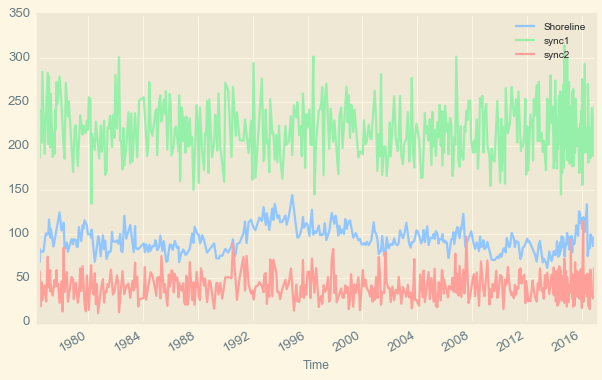

In [385]:
ax = beach_df.plot(linewidth=2, fontsize=12)
ax.set_xlabel('Time')
ax.legend(fontsize=9)
plt.show()

### `.plot.area()`

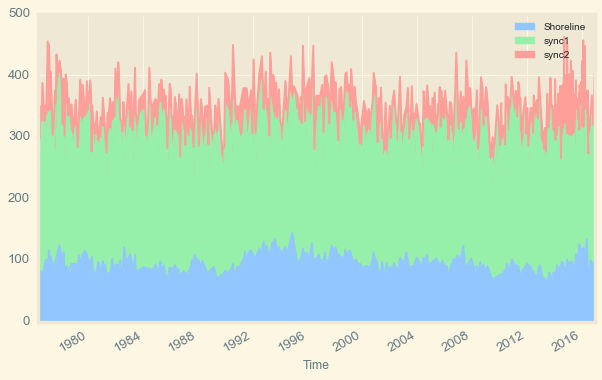

In [390]:
ax = beach_df.plot.area(fontsize=12)
ax.set_xlabel('Time')
ax.legend(fontsize=9)
plt.show()

### `subplot=True`, `layout=(nrow, ncol)`, `sharex=False/True`, `sharey=False/True`, `colormap='viridis'`

C:\Users\dengj\Miniconda3\envs\mds574\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


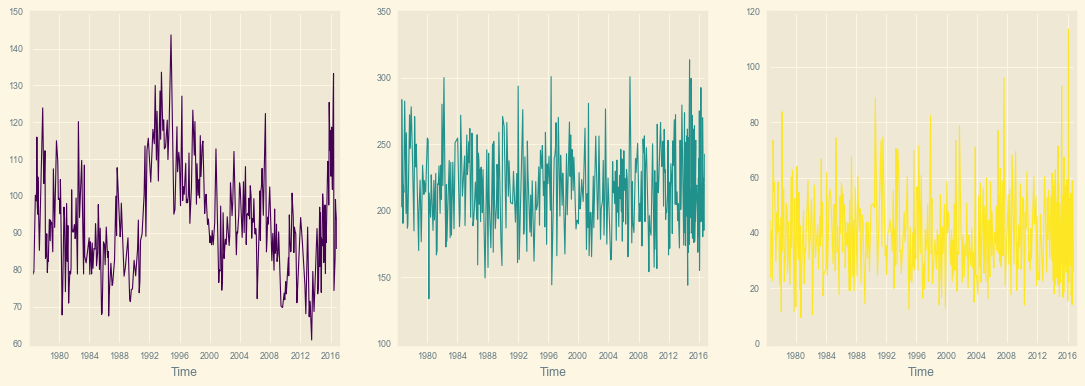

In [403]:
beach_df.plot(
    figsize=(15, 5),
    subplots=True,
    layout=(1, 3),
    sharex=False,
    sharey=False,
    colormap='viridis',
    fontsize=8,
    legend=False,
    linewidth=1
)

plt.show()

## 5. Conclusion:
- [`matplotlib`](https://matplotlib.org/)
- [`matplotlib.pyplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot)
- [datacamp](https://www.datacamp.com/courses/visualizing-time-series-data-in-python)